📁 Please upload your image (e.g., images.jpg from Downloads)


Saving download (1).jpg to download (1).jpg
✅ Uploaded file: download (1).jpg


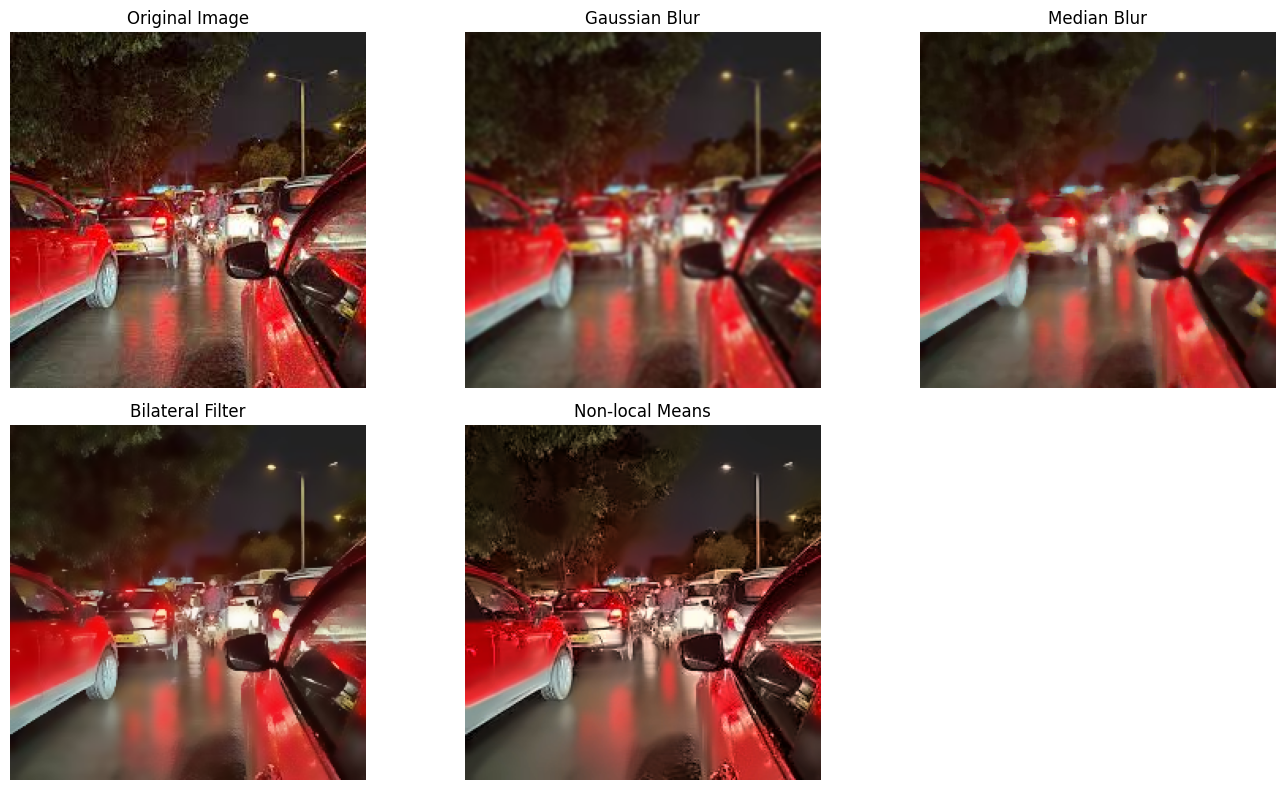

In [5]:
# --- Step 1: Import required libraries ---
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

# --- Step 2: Upload the image from your system ---
print("📁 Please upload your image (e.g., images.jpg from Downloads)")
uploaded = files.upload()  # You’ll be prompted to choose the file manually

# Get the uploaded filename
filename = list(uploaded.keys())[0]
print(f"✅ Uploaded file: {filename}")

# --- Step 3: Read the uploaded image ---
img = cv2.imread(filename)

if img is None:
    raise FileNotFoundError("❌ Could not read the uploaded image. Please re-upload a valid file.")

# Convert from BGR to RGB (for Matplotlib display)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# --- Step 4: Apply noise reduction filters ---
# 1. Gaussian Blur
gaussian = cv2.GaussianBlur(img_rgb, (5, 5), 0)

# 2. Median Blur
median = cv2.medianBlur(img_rgb, 5)

# 3. Bilateral Filter (edge-preserving)
bilateral = cv2.bilateralFilter(img_rgb, 9, 75, 75)

# 4. Non-local Means Denoising (best quality)
nl_means = cv2.fastNlMeansDenoisingColored(
    img_rgb, None, h=10, hColor=10, templateWindowSize=7, searchWindowSize=21
)

# --- Step 5: Display results ---
titles = ['Original Image', 'Gaussian Blur', 'Median Blur', 'Bilateral Filter', 'Non-local Means']
images = [img_rgb, gaussian, median, bilateral, nl_means]

plt.figure(figsize=(14, 8))
for i in range(5):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()

